# Can we tell real sequences from fake, random sequences? Find out in this next episode!

In [451]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Conv1D,Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
import matplotlib.pyplot as plt
%matplotlib inline

# Genetics

In [ ]:
# Encoding Scheme
# A: 1
# C: 2
# G: 3
# T: 4

In [477]:
# Generate Fake Sequences
seq_length = 10000
num_seqs = 3500
fake_seqs = np.random.randint(4,size=(num_seqs,seq_length))+1

In [478]:
len(big_seq)-(10000*3500)

5260487

In [479]:
# Get real sequences
big_seq = big_seq.replace(" ","")
big_seq = big_seq.replace("\n","")
real_seqs = np.zeros((num_seqs, seq_length))
for i in range(num_seqs):
    seq = big_seq[i*seq_length: (i+1)*seq_length]
    vec = seq_to_vec(seq)
    real_seqs[i] = vec

In [480]:
X = np.zeros((2*num_seqs, seq_length))
y = np.zeros(2*num_seqs)

X[:num_seqs] = fake_seqs
y[:num_seqs] = 0

X[num_seqs:] = real_seqs
y[num_seqs:] = 1

max_length = seq_length

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [482]:
len(big_seq)

39600480

# Vanilla NN

In [383]:
vmodel = Sequential()
vmodel.add(Dense(1000, activation='relu',input_dim=max_length))
#model.add(Dropout(0.5))
vmodel.add(Dense(100, activation='relu'))
vmodel.add(Dense(100, activation='relu'))

vmodel.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))

vmodel.add(Dense(100, activation='relu',input_dim=max_length))
vmodel.add(Dense(1, activation='sigmoid'))
vmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(vmodel.summary())
vmodel.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 1000)              10001000  
_________________________________________________________________
dense_111 (Dense)            (None, 100)               100100    
_________________________________________________________________
dense_112 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_113 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_114 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 101       
Total params: 10,131,501
Trainable params: 10,131,501
Non-trainable params: 0
________________________________________________________________

KeyboardInterrupt: 

# CNN

In [483]:
X_train_exp = np.expand_dims(X_train, axis=2)

In [488]:

model = Sequential()
model.add(Conv1D(16, 2, activation='relu', input_shape=(seq_length,1)))
model.add(Conv1D(16, 2, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(16, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train_exp, y_train, batch_size=16, epochs=10, validation_split=0.2)

Train on 4200 samples, validate on 1050 samples
Epoch 1/10
4200/4200 [==============================] - 34s - loss: 0.6929 - acc: 0.5171 - val_loss: 0.6924 - val_acc: 0.4886
Epoch 2/10
4200/4200 [==============================] - 28s - loss: 0.6830 - acc: 0.5805 - val_loss: 0.6629 - val_acc: 0.5114
Epoch 3/10
4200/4200 [==============================] - 24s - loss: 0.6075 - acc: 0.7100 - val_loss: 0.4936 - val_acc: 0.8362
Epoch 4/10
4200/4200 [==============================] - 25s - loss: 0.3896 - acc: 0.8679 - val_loss: 0.2885 - val_acc: 0.9010
Epoch 5/10
4200/4200 [==============================] - 26s - loss: 0.2283 - acc: 0.9379 - val_loss: 0.1343 - val_acc: 0.9971
Epoch 6/10
4200/4200 [==============================] - 26s - loss: 0.1387 - acc: 0.9648 - val_loss: 0.0699 - val_acc: 0.9886
Epoch 7/10
4200/4200 [==============================] - 26s - loss: 0.0757 - acc: 0.9883 - val_loss: 0.0350 - val_acc: 0.9990
Epoch 8/10
4200/4200 [==============================] - 25s - loss: 0.

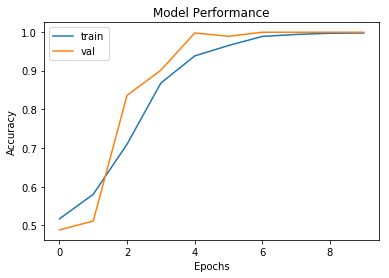

In [498]:
plt.plot(history.history["acc"],label="train")
plt.plot(history.history["val_acc"],label="val")
plt.legend()
plt.title("Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("cnn_loss.png",dpi=500)

(array([ 9086945.,        0.,        0.,  8313083.,        0.,        0.,
         8400089.,        0.,        0.,  9199883.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

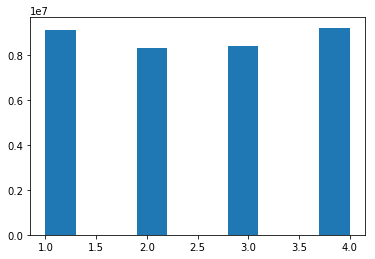

In [485]:
plt.hist(real_seqs.flatten())

(array([ 8747965.,        0.,        0.,  8754235.,        0.,        0.,
         8752914.,        0.,        0.,  8744886.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

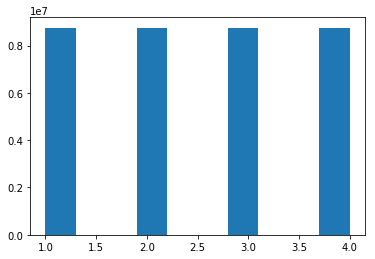

In [486]:
plt.hist(fake_seqs.flatten())

In [499]:
X_test_exp = np.expand_dims(X_test, axis=2)

In [500]:
scores = model.evaluate(X_test_exp, y_test, verbose=0)
print scores

[0.02242070699589593, 0.99714285693849836]


# LSTM

In [385]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_length))
#model.add(Dropout(0.5))
model.add(LSTM(100))
#model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
# Final evaluation of the model
#scores = model.evaluate(X_test[:100], y_test[:100], verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

NameError: name 'RNN' is not defined

In [293]:
scores = model.evaluate(X_test, y_test)
print scores
print("Accuracy: %.2f%%" % (scores[1]*100))

50/50 [==============================] - 0s     
[0.70228164434432983, 0.44000000953674318]
Accuracy: 44.00%


# Logistic Regression Approach

In [232]:
real_seqs[0]

array([ 1.,  1.,  3.,  3.,  2.,  2.,  4.,  3.,  3.,  2.,  1.,  3.,  1.,
        3.,  4.,  2.,  4.,  4.,  4.,  2.,  2.,  2.,  1.,  3.,  3.,  3.,
        1.,  1.,  1.,  3.,  2.,  4.,  1.,  2.,  1.,  1.,  3.,  2.,  1.,
        3.,  2.,  1.,  1.,  1.,  2.,  1.,  3.,  4.,  2.,  4.,  3.,  2.,
        1.,  4.,  3.,  3.,  3.,  4.,  2.,  1.,  4.,  2.,  2.,  2.,  2.,
        4.,  4.,  2.,  1.,  2.,  4.,  2.,  2.,  2.,  1.,  3.,  2.,  4.,
        2.,  1.,  3.,  1.,  3.,  2.,  2.,  2.,  1.,  3.,  3.,  2.,  2.,
        1.,  3.,  3.,  3.,  3.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  3.,
        1.,  1.,  1.,  3.,  3.,  2.,  4.,  2.,  4.,  3.,  3.,  4.,  3.,
        3.,  1.,  3.,  1.,  1.,  2.,  2.,  4.,  3.,  4.,  3.,  2.,  1.,
        4.,  3.,  1.,  1.,  3.,  3.,  2.,  4.,  3.,  4.,  2.,  1.,  1.,
        2.,  2.,  1.,  3.,  4.,  2.,  2.,  1.,  4.,  1.,  3.,  3.,  2.,
        1.,  1.,  3.,  2.,  2.,  4.,  3.,  3.,  2.,  4.,  3.,  2.,  2.,
        4.,  2.,  2.,  1.,  3.,  2.,  4.,  3.,  3.,  3.,  4.,  2

In [286]:
from sklearn.linear_model import LogisticRegression

In [501]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [502]:
y_test

array([ 0.,  1.,  0., ...,  0.,  0.,  1.])

In [503]:
lr.score(X_train,y_train)

1.0

In [504]:
lr.score(X_test,y_test)

0.51714285714285713

In [304]:
np.count_nonzero(y_train==1)/float(y_train.shape[0])

0.48

In [22]:
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


In [35]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

8
[3.0, 6.0, 4.0, 6.0, 9.0, 7.0, 3.0, 9.0, 7.0]


In [49]:
seq = 'ACGT'
text = " ".join(seq)
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)
# integer encode the document
result = one_hot(text, 6)
print(result)

4
[5, 5, 5, 2]


In [472]:
def seq_to_vec(sequence):
    sequence = sequence.replace(" ","")
    sequence = sequence.replace("\n","")
    vec = np.zeros(len(sequence))
    for i,s in enumerate(sequence):
        c = 0
        if s == "A":
            c = 1
        elif s == "C":
            c = 2
        elif s == "G":
            c = 3
        elif s == "T":
            c = 4
        
        # N means unknown, randomly choose
        # Note: this happens very little
        if c == 0:
            c = np.random.choice([1,2,3,4])
        
        vec[i] = c
            
    return vec

def vec_to_seq(vec):
    seq = ""
    for i in vec:
        if i == 1:
            seq += "A"
        if i == 2:
            seq += "C"
        if i == 3:
            seq += "G"
        if i == 4:
            seq += "T"
    return seq
        

In [473]:
# Real Sequences
big_seq = ""
seq_file = open("bigseq.txt","rb")
for line in seq_file:
    big_seq += line    


In [476]:
print np.random.choice([1,2,3,4])

3
